# To read and understand what I want to explore:
- https://towardsdatascience.com/augment-your-small-dataset-using-transformers-synonym-replacement-for-sentiment-analysis-part-1-87a838cd0baa

# Sentiment analysis
- This type of task corresponds to a multiclass classification problem

 This file will have sentiment analysis using existing datasets as inputs rather than existing models

In [58]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.linear_model import SGDClassifier
import logging
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

# Using only the data we have available

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/ready.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'ID', 'labels', 'text', 'sentiment', 'text_w_tags', 'text_not_abbr',
       'text_contr', 'text_corrected', 'lower_case', 'no_punct', 'sw_nltk',
       'sw_nltkp', 'sw_spacy', 'sw_spacyp', 'porter_sw_nltk',
       'porter_sw_nltkp', 'porter_sw_spacy', 'porter_sw_spacyp',
       'porter_no_sw', 'porter_vanilla', 'lemma_sw_nltk', 'lemma_sw_nltkp',
       'lemma_sw_spacy', 'lemma_sw_spacyp', 'lemma_no_sw', 'lemma_vanilla',
       'porter_sw_nltk_e', 'porter_sw_nltk_ne', 'porter_sw_nltkp_e',
       'porter_sw_nltkp_ne', 'porter_sw_spacy_e', 'porter_sw_spacy_ne',
       'porter_sw_spacyp_e', 'porter_sw_spacyp_ne', 'porter_no_sw_e',
       'porter_no_sw_ne', 'porter_vanilla_e', 'porter_vanilla_ne',
       'lemma_sw_nltk_e', 'lemma_sw_nltk_ne', 'lemma_sw_nltkp_e',
       'lemma_sw_spacy_e', 'lemma_sw_spacy_ne', 'lemma_sw_spacyp_e',
       'lemma_sw_spacyp_ne', 'lemma_no_sw_e', 'lemma_no_sw_ne',
       'lemma_van

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,ID,labels,text,sentiment,text_w_tags,text_not_abbr,...,lemma_sw_nltk_ne,lemma_sw_nltkp_e,lemma_sw_spacy_e,lemma_sw_spacy_ne,lemma_sw_spacyp_e,lemma_sw_spacyp_ne,lemma_no_sw_e,lemma_no_sw_ne,lemma_vanilla_e,lemma_vanilla_ne
0,0,0,0,0,1237715_0,"15,16,18,21",Hello! I'm brazilian and I'm 27 y/o. My life i...,negative,Hello! I'm brazilian and I'm y/o. My life is r...,Hello! I'm brazilian and I'm y/o. My life is r...,...,hello brazilian life ruin al great stomach not...,hello ! I brazilian I / . My life ruin . I al ...,hello brazilian o life ruin al great stomach n...,hello brazilian o life ruin al great stomach n...,hello ! I brazilian I / o . My life ruin . I a...,hello ! I brazilian I / o . My life ruin . I a...,hello i am brazilian and i am a o my life is r...,hello i am brazilian and i am a o my life is r...,hello ! I am brazilian and I am a / o . My lif...,hello ! I am brazilian and I am a / o . My lif...
1,1,1,1,1,1237715_1,0,Your English is excellent. I think you probabl...,neutral,Your English is excellent. I think you probabl...,Your English is excellent. I think you probabl...,...,english excel think probabl oneself enough kee...,your english excel . I think probabl oneself e...,english excel think probabl oneself return iss...,english excel think probabl oneself return iss...,your english excel . I think probabl oneself r...,your english excel . I think probabl oneself r...,your english is excel i think you probabl ones...,your english is excel i think you probabl ones...,your english is excel . I think you probabl on...,your english is excel . I think you probabl on...
2,2,2,2,2,1237715_2,5,There is nothing to be ashamed of. Everyone ne...,neutral,There is nothing to be ashamed of. Everyone ne...,There is nothing to be ashamed of. Everyone ne...,...,noth asham everyon need help point life tri ev...,there noth asham . everyon need help point lif...,asham need help point life tri need trust ment...,asham need help point life tri need trust ment...,there asham . everyon need help point life . y...,there asham . everyon need help point life . y...,there is noth to be asham of everyon need help...,there is noth to be asham of everyon need help...,there is noth to be asham of . everyon need he...,there is noth to be asham of . everyon need he...
3,3,3,3,3,1237715_3,"11,18",Hey!!! cant say anything but you are not alone...,neutral,Hey!!! cant say anything but you are not alone...,Hey!!! cant say anything but you are not alone...,...,hey cannot say anyth not alon symptom tri thin...,hey ! ! ! cannot say anyth not alon symptom . ...,hey not symptom tri thing improv tri mental he...,hey not symptom tri thing improv tri mental he...,hey ! ! ! not symptom . tri thing improv . tri...,hey ! ! ! not symptom . tri thing improv . tri...,hey cannot say anyth but you are not alon the ...,hey cannot say anyth but you are not alon the ...,hey ! ! ! cannot say anyth but you are not alo...,hey ! ! ! cannot say anyth but you are not alo...
4,4,4,4,4,1237715_4,0,Its your thyroid. Get it checked as soon as po...,neutral,Its your thyroid. Get it checked as soon as po...,Its your thyroid. Get it checked as soon as po...,...,thyroid get check soon possibl got mine check ...,it thyroid . get check soon possibl I got mine...,thyroid check soon possibl got check lot docto...,thyroid check soon possibl got check lot docto...,it thyroid . get check soon possibl I got chec...,it thyroid . get check soon possibl I got chec...,it your thyroid get it check as soon as possib...,it your thyroid get it check as soon as possib...,it your thyroid . get it check as soon as poss...,it your thyroid . get it check as soon as poss...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,197,197,197,374338_5,18,I just had a similar experience of feeling a d...,neutral,I just had a similar experience of feeling a d...,I just had a similar experience of feeling a d...,...

In [6]:
df[['lemma_sw_spacy_e', 'sw_spacy']].head()

,lemma_sw_spacy_e,sw_spacy
0,hello brazilian o life ruin al great stomach n...,hello brazilian o life ruined al great stomach...
1,english excel think probabl oneself return iss...,english excellent think probably oneself retur...
2,asham need help point life tri need trust ment...,ashamed needs help point life tried need trust...
3,hey not symptom tri thing improv tri mental he...,hey not symptoms tried things improved tried m...
4,thyroid check soon possibl got check lot docto...,thyroid checked soon possible got checked lot ...


In [7]:
df['sw_spacy'].iloc[75:76]

75    ha lol sorry d moved different spot position d...
Name: sw_spacy, dtype: object

In [8]:
COLUMN_TEXT ='sw_spacy'

In [9]:
df[COLUMN_TEXT].fillna('', inplace=True)

# Some analysis

In [10]:
df['sentiment'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

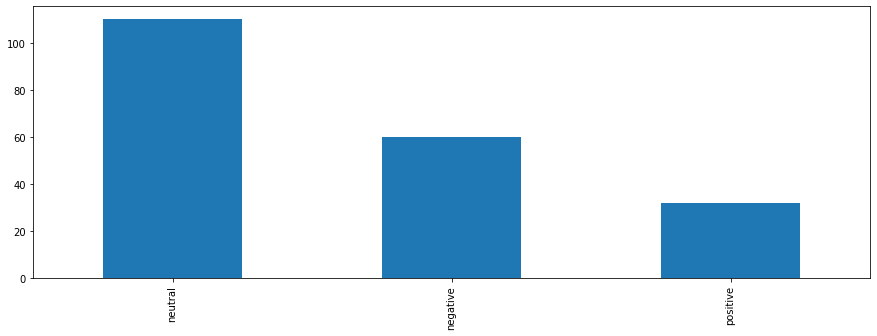

In [11]:
df['sentiment'].value_counts().plot(kind = 'bar', figsize = (15,5))

# Data preprocessing

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [13]:
def polarity_txt(text):
  return TextBlob(text).sentiment[0] 

# Feature engineering for sentiment analysis

In [14]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid_obj = SentimentIntensityAnalyzer()

def output_VADER(text):
  return sid_obj.polarity_scores(text)['compound']

In [16]:
def polarity_txt(text):
  return TextBlob(text).sentiment[0] 

In [17]:
length_features = ['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'unique_words', 'nr_sent', 'count_stopwords']

In [18]:
from string import punctuation

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def count_punctuations(text):
    d=dict()
    for i in punctuation:
        d[str(i)+' count']=text.count(i)
    return d 

def count_sent(text):
    return len(nltk.sent_tokenize(text))

In [19]:
df['text_corrected']

0      Hello ! I am brazilian and I am a / o . My lif...
1      Your English is excellent . I think you probab...
2      There is nothing to be ashamed of . Everyone n...
3      Hey ! ! ! cannot say anything but you are not ...
4      Its your thyroid . Get it checked as soon as p...
                             ...                        
197    I just had a similar experience of feeling a d...
198    Thank you for posting . I sating to think I wa...
199    During an induced coma follo a heart operation...
200    I have been doing his for years . especially a...
201    i have a lot of similar actions I am curious t...
Name: text_corrected, Length: 202, dtype: object

In [20]:
def append_features_length(df, column):
  df2 = df[[column, 'sentiment', 'text_corrected']].copy()
  df2['count_stopwords'] = df['text_corrected'].apply(lambda x : count_stopwords(x))
  df2['nr_sent'] = df['text_corrected'].apply(lambda x : count_sent(x))
  df2['count_punct'] = df['text_corrected'].apply(lambda x : count_punctuations(x))
  df2['unique_words'] = df2[column].apply(lambda x : len(set(x.split())))
  df2['word_count'] = df2[column].apply(lambda x: len(str(x).split(" ")))
  df2['char_count'] = df2[column].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
  df2['sentence_count'] = df2[column].apply(lambda x: len(str(x).split(".")))
  df2['avg_word_length'] = df2['char_count'] / df2['word_count']
  df2['avg_sentence_lenght'] = df2['word_count'] / df2['sentence_count']
  return df2

In [21]:
df = append_features_length(df, COLUMN_TEXT)

In [22]:
df_punct = pd.DataFrame(list(df.count_punct))

# Merging pnctuation DataFrame with main DataFrame
#df = pd.merge(df, df_punct, left_index=True, right_index=True)
#df.drop(columns=['count_punct'],inplace=True)

In [23]:
#length_features = length_features + df_punct.columns.tolist()

In [24]:
length_features

['word_count',
 'char_count',
 'sentence_count',
 'avg_word_length',
 'avg_sentence_lenght',
 'unique_words',
 'nr_sent',
 'count_stopwords']

In [25]:
df['textblob'] = df['text_corrected'].apply(polarity_txt)
df['vader'] = df['text_corrected'].apply(output_VADER)

In [26]:
df[length_features + ['vader', 'textblob']]

,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,unique_words,nr_sent,count_stopwords,vader,textblob
0,311,1785,1,5.739550,311.0,192,39,399,-0.9950,0.007364
1,59,412,1,6.983051,59.0,52,10,71,-0.9483,0.086111
2,15,93,1,6.200000,15.0,14,5,24,0.8572,0.118750
3,28,151,1,5.392857,28.0,24,13,45,0.8932,0.064583
4,17,83,1,4.882353,17.0,16,7,15,0.9493,0.350000
...,...,...,...,...,...,...,...,...,...,...
197,47,308,1,6.553191,47.0,44,9,59,0.7805,0.069940
198,347,2015,1,5.806916,347.0,243,35,408,0.9818,0.063364
199,16,106,1,6.625000,16.0,15,2,11,0.8074,0.308333
200,28,155,1,5.535714,28.0,24,5,42,-0.2247,-0.325000


In [27]:
import spacy.cli

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [28]:
## call model
ner = spacy.load("en_core_web_lg")

In [29]:
## tag text
txt = df[COLUMN_TEXT].iloc[5]
doc = ner(txt)
spacy.displacy.render(doc, style="ent", jupyter=True)

In [30]:
df['tags'] = df[COLUMN_TEXT].apply(lambda x: [ (tag.text, tag.label_) for tag in ner(x).ents] )

In [31]:
df.head()

,sw_spacy,sentiment,text_corrected,count_stopwords,nr_sent,count_punct,unique_words,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,textblob,vader,tags
0,hello brazilian o life ruined al great stomach...,negative,Hello ! I am brazilian and I am a / o . My lif...,399,39,"{'! count': 4, '"" count': 0, '# count': 0, '$ ...",192,311,1785,1,5.739550,311.0,0.007364,-0.9950,"[(brazilian, NORP), (years old, DATE), (years ..."
1,english excellent think probably oneself retur...,neutral,Your English is excellent . I think you probab...,71,10,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",52,59,412,1,6.983051,59.0,0.086111,-0.9483,"[(english, NORP), (fda, ORG)]"
2,ashamed needs help point life tried need trust...,neutral,There is nothing to be ashamed of . Everyone n...,24,5,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",14,15,93,1,6.200000,15.0,0.118750,0.8572,[]
3,hey not symptoms tried things improved tried m...,neutral,Hey ! ! ! cannot say anything but you are not ...,45,13,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",24,28,151,1,5.392857,28.0,0.064583,0.8932,"[(past years, DATE)]"
4,thyroid checked soon possible got checked lot ...,neutral,Its your thyroid . Get it checked as soon as p...,15,7,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",16,17,83,1,4.882353,17.0,0.350000,0.9493,[]


In [32]:
import collections

def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

# https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        dic_counter = collections.Counter()
        for tuple in lst_dics_tuples:
              dic_counter[tuple[1]]+=1
        return dic_counter[tag]
    else:
        return 0


In [33]:
## extract ner features

def append_ner_features(df, col_tag):
  tags_set = []
  for lst in df[col_tag].tolist():
      for dic in lst:
            tags_set.append(dic[1])
            #for k in dic.keys():
                #tags_set.append(k[1])
  tags_set = list(set(tags_set))
  for feature in tags_set:
      df[col_tag + "_"+feature] = df[col_tag].apply(lambda x: 
                                                    utils_ner_features(x, feature))
      
  return df, tags_set

In [34]:
df, tags_set = append_ner_features(df,'tags')

In [35]:
ner_features = list(map(lambda x: 'tags_' + x, list(tags_set)))

In [36]:
pos_features = ['adjective', 'noun', 'adverb', 'verb']

In [37]:
from collections import defaultdict

def PoS_counter(text):

  text = word_tokenize(text)
  counter = defaultdict(int)
  for word in  nltk.pos_tag(text):
    if word[1].startswith('J'):
      counter['adjective'] += 1
    elif word[1].startswith('N'):
      counter['noun'] += 1
    elif word[1].startswith('RB'):
      counter['adverb'] += 1
    elif word[1].startswith('VB'):
      counter['verb'] += 1

  return counter

In [38]:
PoS_counter('I am very aware of that')

defaultdict(int, {'adjective': 1, 'adverb': 1, 'verb': 1})

In [39]:
def append_PoS_features(df, col_text):
  df['pos'] = df[col_text].apply(lambda x : PoS_counter(x))
  df_temp = pd.DataFrame(list(df.pos))

  # Merging pnctuation DataFrame with main DataFrame
  df = pd.merge(df, df_temp, left_index=True, right_index=True)
  df.drop(columns=['pos'],inplace=True)
  return df

In [40]:
df = append_PoS_features(df, COLUMN_TEXT)

In [41]:
df.head()

,sw_spacy,sentiment,text_corrected,count_stopwords,nr_sent,count_punct,unique_words,word_count,char_count,sentence_count,...,tags_DATE,tags_NORP,tags_ORDINAL,tags_TIME,tags_GPE,tags_FAC,noun,adjective,verb,adverb
0,hello brazilian o life ruined al great stomach...,negative,Hello ! I am brazilian and I am a / o . My lif...,399,39,"{'! count': 4, '"" count': 0, '# count': 0, '$ ...",192,311,1785,1,...,7,1,0,0,2,0,114.0,69.0,71.0,43.0
1,english excellent think probably oneself retur...,neutral,Your English is excellent . I think you probab...,71,10,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",52,59,412,1,...,0,1,0,0,0,0,31.0,12.0,9.0,4.0
2,ashamed needs help point life tried need trust...,neutral,There is nothing to be ashamed of . Everyone n...,24,5,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",14,15,93,1,...,0,0,0,0,0,0,6.0,4.0,4.0,1.0
3,hey not symptoms tried things improved tried m...,neutral,Hey ! ! ! cannot say anything but you are not ...,45,13,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",24,28,151,1,...,1,0,0,0,0,0,15.0,3.0,4.0,4.0
4,thyroid checked soon possible got checked lot ...,neutral,Its your thyroid . Get it checked as soon as p...,15,7,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",16,17,83,1,...,0,0,0,0,0,0,7.0,4.0,5.0,1.0


### Make custom class to perform feature union to be able to add to a pipeline

In [42]:
df.head()

,sw_spacy,sentiment,text_corrected,count_stopwords,nr_sent,count_punct,unique_words,word_count,char_count,sentence_count,...,tags_DATE,tags_NORP,tags_ORDINAL,tags_TIME,tags_GPE,tags_FAC,noun,adjective,verb,adverb
0,hello brazilian o life ruined al great stomach...,negative,Hello ! I am brazilian and I am a / o . My lif...,399,39,"{'! count': 4, '"" count': 0, '# count': 0, '$ ...",192,311,1785,1,...,7,1,0,0,2,0,114.0,69.0,71.0,43.0
1,english excellent think probably oneself retur...,neutral,Your English is excellent . I think you probab...,71,10,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",52,59,412,1,...,0,1,0,0,0,0,31.0,12.0,9.0,4.0
2,ashamed needs help point life tried need trust...,neutral,There is nothing to be ashamed of . Everyone n...,24,5,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",14,15,93,1,...,0,0,0,0,0,0,6.0,4.0,4.0,1.0
3,hey not symptoms tried things improved tried m...,neutral,Hey ! ! ! cannot say anything but you are not ...,45,13,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",24,28,151,1,...,1,0,0,0,0,0,15.0,3.0,4.0,4.0
4,thyroid checked soon possible got checked lot ...,neutral,Its your thyroid . Get it checked as soon as p...,15,7,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",16,17,83,1,...,0,0,0,0,0,0,7.0,4.0,5.0,1.0


In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer


class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return [{'vader':  row['vader'], 'textblob': row['textblob']} for _, row in data.iterrows()]



class LengthStats(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return data[self.key].to_dict('records')


class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X.todense())


In [44]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df[pos_features]) 
df[pos_features] = scaled_values


In [45]:
df[pos_features]= df[pos_features].fillna(0)

# Define different classifiers:

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

seed = 40
X = df
y = df['sentiment']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

classifiers = [
  {'classifier' : MultinomialNB(),
   'parameters' : {'union__text__bow__ngram_range': [(1, 1), (1, 2)],
                  'union__text__tfidf__use_idf': (True, False),
                  'classifier__alpha': (1e-2, 1e-3),}
   },
   {'classifier': DecisionTreeClassifier(), 
    'parameters': {'union__text__bow__ngram_range': [(1, 1), (1, 2)],
                  'union__text__tfidf__use_idf': (True, False),
                  'classifier__criterion': ['gini', 'entropy'],
                   'classifier__splitter': ['random', 'best'],
                   'classifier__class_weight': [ 'balanced']               
                   }
    },
   {'classifier': GaussianNB(),
    'parameters': {'union__text__bow__ngram_range': [(1, 1), (1, 2)],
                  'union__text__tfidf__use_idf': (True, False),
                   'classifier__var_smoothing': [1e-9, 1e-8, 1e-10]
                   }
    },
   {'classifier' : KNeighborsClassifier(),
    'parameters':{ 'union__text__bow__ngram_range': [(1, 1), (1, 2)],
                  'union__text__tfidf__use_idf': (True, False),
                  'classifier__n_neighbors': [3, 5, 10],
                  'classifier__weights': ['uniform', 'distance'],
                    'classifier__p': [1,2]
                   }
    },
   {'classifier': LinearSVC(max_iter=1000000),
    'parameters': {
        'union__text__bow__ngram_range': [(1, 1), (1, 2)],
        'union__text__tfidf__use_idf': (True, False),
        'classifier__penalty': ['l2'],
        'classifier__loss': ['hinge', 'squared_hinge'],
        'classifier__C': [1.0, 10 ,100, 1000],
        'classifier__class_weight': [ 'balanced']               

    }
    },
   {'classifier': LogisticRegression(), 
     'parameters': {
        'union__text__bow__ngram_range': [(1, 1), (1, 2)],
        'union__text__tfidf__use_idf': (True, False),
        'classifier__penalty': ['l1', 'l2',], # supported by liblineaer
        'classifier__C': [1.0, 10 ,100, 1000],
        'classifier__class_weight': [ 'balanced'],
        'classifier__solver': ['liblinear'] # recommended for small datasets         
     }
    },
   {'classifier': RandomForestClassifier(),
     'parameters': {
        'union__text__bow__ngram_range': [(1, 1), (1, 2)],
        'union__text__tfidf__use_idf': (True, False),
        'classifier__n_estimators': [50, 100, 150, 200],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__class_weight': ['balanced', 'balanced_subsample' ]
     }
    }  

]


### custom pipeline: 

In [47]:
# 6-7, 5-6, 4-5(SVM)
# 3-4 (KNN)
# 2-3
# 1-2
from sklearn.metrics import classification_report, confusion_matrix
for configuration in classifiers[4:5]:

  pipeline = Pipeline([
      ('union', FeatureUnion(
          transformer_list=[

              # Pipeline for pulling features from the text
              # we can add a function to perform something first in preprocessor
              ('text', Pipeline([
                ('selector', ItemSelector(key=COLUMN_TEXT)),
                  ('bow', CountVectorizer(strip_accents='ascii')),  # strings to token integer counts
                  ('tfidf', TfidfTransformer()), # ,preprocessor=clean_txt)
                ])),
              # Pipeline for pulling metadata features
              ('stats', Pipeline([
                  ('selector', ItemSelector(key=['vader', 'textblob'])),
                  ('stats', TextStats()),  # returns a list of dicts
                  ('vect', DictVectorizer()),  # list of dicts -> feature matrix
              ])),

              # Pipeline for pulling metadata features
              ('length', Pipeline([
                  ('selector', ItemSelector(key=length_features)),
                  ('scaling', MinMaxScaler())
              ])),

              ('pos', Pipeline([
                  ('selector', ItemSelector(key=pos_features)),
              ])),

              ('ner', Pipeline([
                  ('selector', ItemSelector(key=ner_features)),

              ])),

          ],

          # weight components in FeatureUnion
          transformer_weights={
              'text': 0.7,
              'stats':0.05,
              'length': 0.05,
              'pos': 0.05,
              'ner': 0.05
              
          },
      )),
      ('to_dense', DenseTransformer()),
      ('scaling', MinMaxScaler()),
      ('classifier', configuration['classifier'])
  ])
  #print(pipeline.get_params().keys())
  grid = GridSearchCV(pipeline, cv=5, param_grid=configuration['parameters'], verbose=1)
  grid.fit(x_train ,y_train)
  print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
  print('\n')
  y_pred = grid.predict(x_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

  #means = grid.cv_results_['mean_test_score']
  #stds = grid.cv_results_['std_test_score']
  #params = grid.cv_results_['params']
  #for mean, stdev, param in zip(means, stds, params):
      #print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Model: 0.695455 using {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'union__text__bow__ngram_range': (1, 1), 'union__text__tfidf__use_idf': True}


              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.60      0.82      0.69        22
           2       1.00      0.29      0.44         7

    accuracy                           0.61        41
   macro avg       0.72      0.51      0.54        41
weighted avg       0.66      0.61      0.59        41

[[ 5  7  0]
 [ 4 18  0]
 [ 0  5  2]]


In [48]:
from sklearn.semi_supervised import SelfTrainingClassifier, LabelPropagation
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier


sdg_params = dict(alpha=1e-5, penalty="l2", loss="log")
vectorizer_params = dict(ngram_range=(1, 3), min_df=5, max_df=0.8)

In [49]:
st_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ("clf", OneVsRestClassifier(SelfTrainingClassifier(SGDClassifier(**sdg_params), verbose=True))),
    ]
)
# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading()),
    ]
)

In [50]:
df_unknown = pd.read_csv('/content/gdrive/My Drive/Mestrado/semi_supervised_learning.csv')

In [51]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=a9ca28311f546920ef2ad9ed3b08fbc815fcceea1a8243b08b9e9a792e5f4a95
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [52]:
from langdetect import detect

In [53]:
def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_unknown = df_unknown[df_unknown['text'].apply(detect_en)]
df_unknown

,Id,ThreadId,MotherId,text,user,date
0,1,2,NaN,"For what it's worth, here is an article debunk...",134578,1640825191
1,2,2,NaN,Has he been tested for covid? I ask because c...,770719,1640883616
2,3,2,NaN,I've heard of various problems related to the ...,163305,1640995029
3,4,2,3.0,One more thought would be to report it to VAER...,163305,1640995161
4,5,2,3.0,VAERS is an unscientific self reporting system...,19040740,1641054812
...,...,...,...,...,...,...
29278,29279,6478,NaN,Thanks so much for sharing this info. I am on ...,1528343,1291785024
29279,29280,6478,NaN,for those of you that are taking Ritalin how...,1525654,1291975892
29280,29281,6478,NaN,Thank you for you tips as well.I will definetl...,1596032,1297297784
29281,29282,6478,NaN,My doc just changed my meds yesterday. I was t...,1712318,1308397948


In [54]:
df_unknown['sentiment'] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_complete = pd.concat([df, df_unknown])

In [56]:
df_complete

,sw_spacy,sentiment,text_corrected,count_stopwords,nr_sent,count_punct,unique_words,word_count,char_count,sentence_count,...,noun,adjective,verb,adverb,Id,ThreadId,MotherId,text,user,date
0,hello brazilian o life ruined al great stomach...,negative,Hello ! I am brazilian and I am a / o . My lif...,399.0,39.0,"{'! count': 4, '"" count': 0, '# count': 0, '$ ...",192.0,311.0,1785.0,1.0,...,0.807143,1.000000,0.736842,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,english excellent think probably oneself retur...,neutral,Your English is excellent . I think you probab...,71.0,10.0,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",52.0,59.0,412.0,1.0,...,0.214286,0.161765,0.084211,0.071429,NaN,NaN,NaN,NaN,NaN,NaN
2,ashamed needs help point life tried need trust...,neutral,There is nothing to be ashamed of . Everyone n...,24.0,5.0,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",14.0,15.0,93.0,1.0,...,0.035714,0.044118,0.031579,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,hey not symptoms tried things improved tried m...,neutral,Hey ! ! ! cannot say anything but you are not ...,45.0,13.0,"{'! count': 3, '"" count': 0, '# count': 0, '$ ...",24.0,28.0,151.0,1.0,...,0.100000,0.029412,0.031579,0.071429,NaN,NaN,NaN,NaN,NaN,NaN
4,thyroid checked soon possible got checked lot ...,neutral,Its your thyroid . Get it checked as soon as p...,15.0,7.0,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",16.0,17.0,83.0,1.0,...,0.042857,0.044118,0.042105,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29278,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29279.0,6478.0,NaN,Thanks so much for sharing this info. I am on ...,1528343.0,1.291785e+09
29279,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29280.0,6478.0,NaN,for those of you that are taking Ritalin how...,1525654.0,1.291976e+09
29280,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29281.0,6478.0,NaN,Thank you for you tips as well.I will definetl...,1596032.0,1.297298e+09
29281,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29282.0,6478.0,NaN,My doc just changed my meds yesterday. I was t...,1712318.0,1.308398e+09


In [57]:
st_pipeline.fit(df_complete.text, df_complete.sentiment)

ValueError: ignored

### Apply the transformations to the raw data:

# Apply grid search CV

# Current model accuracies

In [ ]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y),
                                        y = y                                                    
                                    )
class_weights = dict(zip(np.unique(y), class_weights))
class_weights

# CNN

In [ ]:
import gensim
from nltk.tokenize.treebank import TreebankWordDetokenizer
## add stemming and lemmatization

def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)


temp = []
#Splitting pd.Series to list
data_to_list = df[COLUMN_TEXT].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
data_words = list(sent_to_words(temp))
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

In [ ]:
max_len = int(df[COLUMN_TEXT].apply(len).mean())

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

In [ ]:
tweets.shape

In [ ]:
from keras.utils import np_utils

y =df['sentiment']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y,3)
x_train, x_test, y_train, y_test = train_test_split(tweets, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
df['sentiment'].unique()

In [ ]:
x_train.shape, y_train.shape

# https://stats.stackexchange.com/questions/255105/why-is-the-validation-accuracy-fluctuating => why accuracy is fluctuating

# https://stats.stackexchange.com/questions/329861/what-happens-when-a-model-is-having-more-parameters-than-training-samples

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.05, decay=1e-6, momentum=0.9, nesterov=True)

model2 = Sequential()
model2.add(layers.Embedding(max_words, 16, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(8,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.summary()
model2.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])
#checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(x_train, y_train, epochs=25,validation_data=(x_test, y_test),callbacks=[], class_weight=class_weights)


In [ ]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 16, input_length=max_len))
model3.add(layers.Conv1D(8, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(5))
model3.add(layers.Conv1D(8, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(3,activation='softmax'))
model3.summary()
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history = model3.fit(x_train, y_train, epochs=70,validation_data=(x_test, y_test), class_weight=class_weights)

# Deep learning - LSTMs

In [ ]:
import spacy
!python -m spacy download en_core_web_lg

In [ ]:
import en_core_web_lg
nlp = en_core_web_lg.load()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from tensorflow.python.keras.layers import Layer
from keras import initializers, regularizers, constraints

In [ ]:
from sklearn.model_selection import train_test_split
import time
X = df[COLUMN_TEXT]
y =df['sentiment']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y)
##Create the tf-idf vector
vectorizer = TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = None)

In [ ]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify =y)
vectorizer.fit(x_train)

In [ ]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
 
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]
print(X_train_sequences[0])

In [ ]:
MAX_SEQ_LENGHT=60   ######## check this

N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

In [ ]:
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [ ]:
EMBEDDINGS_LEN = 300

embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass
      
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)   

In [ ]:
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(8, dropout=0.2))
model.add(Dense(len(set(y)), activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
list_result=[]

In [ ]:
model.fit(X_train_sequences, y_train, 
          epochs=5, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate(X_test_sequences, y_test, verbose=1)
print("Accuracy:", scores[1])  #
list_result.append(("LSTM Simple", scores[1]))

In [ ]:

from keras.models import Model
from keras.layers import Dense ,LSTM,concatenate,Input,Flatten,BatchNormalization, GRU

text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(28,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))(text_data)
x2 = ((LSTM(8, dropout=0.2, recurrent_dropout=0.2)))(x)
x4 = concatenate([x2, meta_data])
x5 = Dense(8, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model = Model(inputs=[text_data, meta_data ], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
df_cat_train = df.iloc[x_train.index][length_features + pos_features + ner_features + ['vader', 'textblob']]
df_cat_test = df.iloc[x_test.index][length_features + pos_features + ner_features + ['vader', 'textblob']]


In [ ]:
model.fit([X_train_sequences, df_cat_train], y_train, 
          epochs=12, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate([X_test_sequences, df_cat_test],y_test, verbose=1)
print("Accuracy:", scores[1])  
list_result.append(("LSTM with Multi-Input", scores[1]))

# Model with two GRU (BI-GRU)

In [ ]:
text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(28,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))(text_data)
x2 = ((GRU(8, dropout=0.2, recurrent_dropout=0.2,  return_sequences=True)))(x)
x3 = ((GRU(8, dropout=0.2, recurrent_dropout=0.2)))(x2)
x4 = concatenate([x3, meta_data])
x5 = Dense(16, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model = Model(inputs=[text_data, meta_data], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit([X_train_sequences, df_cat_train], y_train, 
          epochs=20, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate([X_test_sequences, df_cat_test],y_test, verbose=1)
print("Accuracy:", scores[1])  # 
list_result.append(("Bi-GRU", scores[1]))

# LSTM with attention

In [ ]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        #assert len(input_shape) == 28
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    

text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(28,), name = 'meta')
x = Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False)(text_data)
x1 = (LSTM(8, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))(x)
x2 = Dropout(0.25)(x1)
x3 = Attention(MAX_SEQ_LENGHT)(x2)
x4 = Dense(8, activation='relu')(x3)
x5 = Dropout(0.25)(x4)
x6 = BatchNormalization()(x5)
x7 = concatenate([x6, meta_data])
x8 = Dense(8, activation='relu')(x7)
x9 = Dropout(0.25)(x8)
x10 = BatchNormalization()(x9)
outp = Dense(len(set(y)), activation='softmax')(x10)

AttentionLSTM = Model(inputs=[text_data, meta_data ], outputs=outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

AttentionLSTM.summary()

In [ ]:
AttentionLSTM.fit([X_train_sequences, df_cat_train], y_train, 
          epochs=20, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = AttentionLSTM.evaluate([X_test_sequences, df_cat_test],y_test, verbose=1)
print("Accuracy:", scores[1])  # 
list_result.append(("LSTM with Attention", scores[1]))

In [ ]:
pd.DataFrame(list_result, columns=['model', 'accuracy'])

In [ ]:
scores = AttentionLSTM.predict([X_test_sequences, df_cat_test])

In [ ]:
scores

In [ ]:
np.argmax(scores, axis=1)